<a href="https://colab.research.google.com/github/RheyMartt/CCDATSCL_EXERCISES_COM222/blob/main/Exercise2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 2

<img src="https://vsqfvsosprmjdktwilrj.supabase.co/storage/v1/object/public/images/insights/1753644539114-netflix.jpeg"/>


In this activity , you will explore two fundamental preprocessing techniques used in data science and machine learning: feature scaling and discretization (binning).

These techniques are essential when working with datasets that contain numerical values on very different scales, or continuous variables that may be more useful when grouped into categories.


We will use a subset of the Netflix Movies and TV Shows dataset, which contains metadata such as release year, duration, ratings, and other attributes of titles currently or previously available on Netflix. Although the dataset is not originally designed for numerical modeling, it contains several features suitable for preprocessing practice—such as:
-Release Year
-Duration (in minutes)
-Number of Cast Members
-Number of Listed Genres
-Title Word Count

In this worksheet, you will:
- Load and inspect the dataset
- Select numerical features for scaling
- Apply different scaling techniques
- Min–Max Scaling
- Standardization
- Robust Scaling
- Perform discretization (binning)
- Equal-width binning
- Equal-frequency binning
- Evaluate how scaling affects machine learning performance, using a simple KNN

In [149]:
import pandas as pd
import os
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub


## 1. Setup and Data Loading



Load the Netflix dataset into a DataFrame named df.

In [150]:

# Download latest version
path = kagglehub.dataset_download("shivamb/netflix-shows")

print("Path to dataset files:", path)


if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)

Using Colab cache for faster access to the 'netflix-shows' dataset.
Path to dataset files: /kaggle/input/netflix-shows
True


## 2. Data Understanding

Store the dataset’s column names in a variable called cols.

In [151]:
cols = df.columns.tolist()
print(cols)

['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


Store the shape of the dataset as a tuple (rows, columns) in shape_info.

In [152]:
shape_info = df.shape
print(shape_info)

(8807, 12)


## 3. Data Cleaning
Count missing values per column and save to missing_counts.

In [153]:
missing_counts = df.isnull().sum()
print(missing_counts)

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


Drop rows where duration is missing. Save to df_clean.

In [154]:
df_clean = df.dropna(subset=['duration'])
display(df_clean)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


4. Selecting Relevant Numeric Features

Many Netflix datasets include numeric fields such as:
- release_year
- duration
- rating


Create a DataFrame `df_num` containing only numeric columns.

In [155]:
import pandas as pd

# Re-initialize df_clean to ensure no lingering rating columns from previous runs
df_clean = df.dropna(subset=['duration'])

# Function to parse duration into minutes for movies and seasons for TV shows
def parse_duration(row):
    if pd.isna(row['duration']):
        return None, None
    duration_str = row['duration']
    if 'min' in duration_str:
        return int(duration_str.replace(' min', '').strip()), None
    elif 'Season' in duration_str:
        return None, int(duration_str.split(' ')[0].strip())
    return None, None

# Apply the function to create new temporary columns
parsed_data = df_clean.apply(parse_duration, axis=1, result_type='expand')
parsed_data.columns = ['duration_minutes', 'num_seasons']

# Assign new columns to df_clean
df_clean.loc[:, ['duration_minutes', 'num_seasons']] = parsed_data

# --- Feature Engineering: Incorporate num_seasons into duration_minutes ---
# Estimate average minutes per season (e.g., 10 episodes * 50 minutes/episode)
MINUTES_PER_SEASON = 500

# Fill NaN values in 'duration_minutes' with estimated minutes from 'num_seasons'
# This assumes if 'duration_minutes' is NaN, it's a TV show, and vice-versa.
df_clean.loc[:, 'duration_minutes'] = df_clean['duration_minutes'].fillna(df_clean['num_seasons'] * MINUTES_PER_SEASON)

# Drop the now redundant 'num_seasons' column
df_clean = df_clean.drop(columns=['num_seasons'])

# Now select all numeric types from the modified df_clean to create df_num
df_num = df_clean.select_dtypes(include=['number'])

display(df_num.head())

,release_year,duration_minutes
0,2020,90.0
1,2021,1000.0
2,2021,500.0
3,2021,500.0
4,2021,1000.0


## 5. Feature Scaling

Focus on a single numeric column (e.g., duration).


Extract the column duration into a Series named `dur`.

In [156]:
dur = df_num['duration_minutes']
display(dur)

,duration_minutes
0,90.0
1,1000.0
2,500.0
3,500.0
4,1000.0
...,...
8802,158.0
8803,1000.0
8804,88.0
8805,88.0


Apply Min–Max Scaling to `dur`. Store the result as `dur_minmax`.

In [157]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Impute NaN values with the mean before scaling
dur_imputed = dur.fillna(dur.mean())

# Reshape the Series to a 2D array as MinMaxScaler expects a 2D input
dur_reshaped = dur_imputed.values.reshape(-1, 1)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
dur_minmax_scaled = scaler.fit_transform(dur_reshaped)

# Convert the scaled array back to a Series with the original index
dur_minmax = pd.Series(dur_minmax_scaled.flatten(), index=dur.index) # Use original index to preserve alignment

display(dur_minmax)

,0
0,0.010239
1,0.117336
2,0.058491
3,0.058491
4,0.117336
...,...
8802,0.018242
8803,0.117336
8804,0.010004
8805,0.010004


Apply Z-score Standardization to `dur`. Store in `dur_zscore`.

In [158]:
from sklearn.preprocessing import StandardScaler

# Reuse dur_imputed which has NaN values filled
# Reshape the Series to a 2D array as StandardScaler expects a 2D input
dur_imputed_reshaped = dur_imputed.values.reshape(-1, 1)

# Initialize the StandardScaler
scaler_zscore = StandardScaler()

# Fit and transform the data
dur_zscore_scaled = scaler_zscore.fit_transform(dur_imputed_reshaped)

# Convert the scaled array back to a Series with the original index
dur_zscore = pd.Series(dur_zscore_scaled.flatten(), index=dur.index)

display(dur_zscore)

,0
0,-0.437240
1,1.170126
2,0.286958
3,0.286958
4,1.170126
...,...
8802,-0.317129
8803,1.170126
8804,-0.440773
8805,-0.440773


## 6. Discretization (Binning)
Apply equal-width binning to dur into 5 bins. Store as `dur_width_bins`.


- Use `pandas.cut()` to divide duration_minutes into 4 `equal-width bins`.
- Add the resulting bins as a new column named:
`duration_equal_width_bin`

,duration_minutes,duration_equal_width_bin
0,90.0,"(-5.497, 2127.25]"
1,1000.0,"(-5.497, 2127.25]"
2,500.0,"(-5.497, 2127.25]"
3,500.0,"(-5.497, 2127.25]"
4,1000.0,"(-5.497, 2127.25]"



--- Overall Histogram for Equal-Width Bins ---
This histogram shows the overall distribution of 'duration_minutes' with 4 equal-width bins. Notice how most of the data is concentrated in the first bin, indicating a highly skewed distribution.


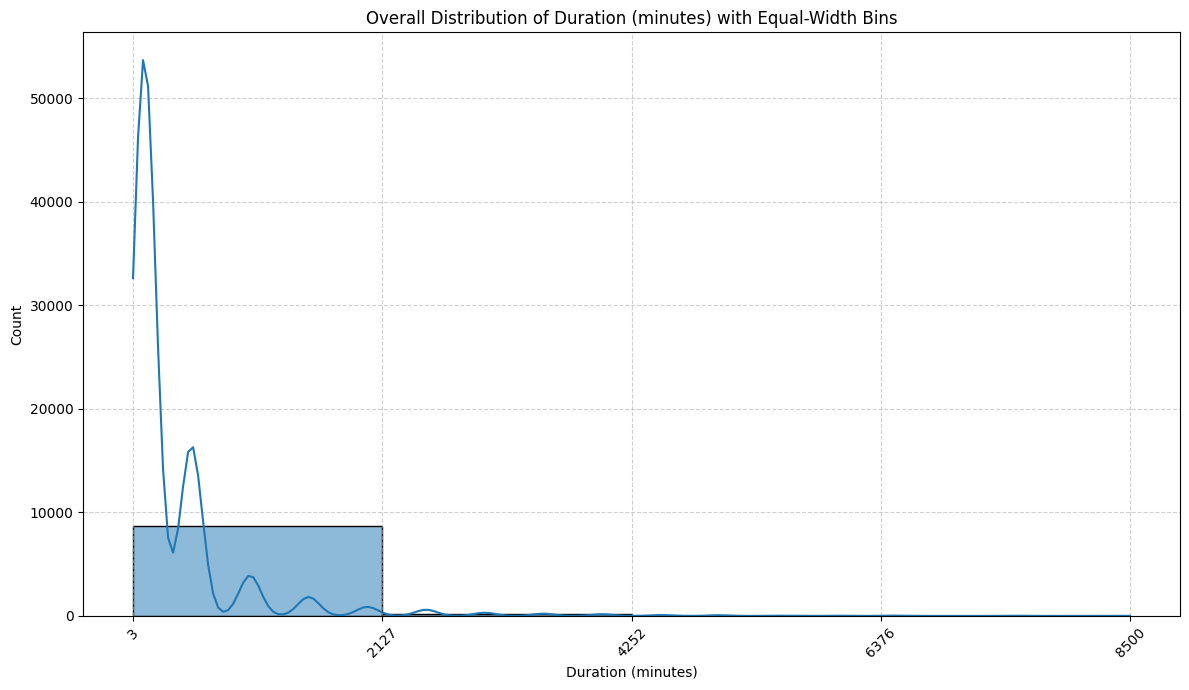

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Apply equal-width binning
df_clean.loc[:, 'duration_equal_width_bin'] = pd.cut(df_clean['duration_minutes'], bins=4)
display(df_clean[['duration_minutes', 'duration_equal_width_bin']].head())

print("\n--- Overall Histogram for Equal-Width Bins ---")
print("This histogram shows the overall distribution of 'duration_minutes' with 4 equal-width bins. Notice how most of the data is concentrated in the first bin, indicating a highly skewed distribution.")

# Calculate bin edges for plotting
min_duration = df_clean['duration_minutes'].min()
max_duration = df_clean['duration_minutes'].max()
num_bins = 4
bin_edges = np.linspace(min_duration, max_duration, num_bins + 1)

plt.figure(figsize=(12, 7))
sns.histplot(df_clean['duration_minutes'].dropna(), bins=bin_edges, kde=True)
plt.title('Overall Distribution of Duration (minutes) with Equal-Width Bins')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(bin_edges, rotation=45) # Show bin edges on x-axis
plt.tight_layout()
plt.show()

Describe the characteristics of each bin

- What are the bin edges produced by equal-width binning?
- How many movies fall into each bin?

In [166]:
import pandas as pd

# Apply equal-width binning to dur_minmax
dur_minmax_bins = pd.cut(dur_minmax, bins=4)

# Get the bin edges
bin_edges_minmax = dur_minmax_bins.cat.categories
print("Bin Edges (Equal-Width, from dur_minmax):")
print(bin_edges_minmax)

# Count the number of items in each bin
bin_counts_minmax = dur_minmax_bins.value_counts().sort_index()
print("\nNumber of items per bin (Equal-Width, from dur_minmax):")
print(bin_counts_minmax)

Bin Edges (Equal-Width, from dur_minmax):
IntervalIndex([(-0.001, 0.25], (0.25, 0.5], (0.5, 0.75], (0.75, 1.0]], dtype='interval[float64, right]')

Number of items per bin (Equal-Width, from dur_minmax):
(-0.001, 0.25]    8640
(0.25, 0.5]        138
(0.5, 0.75]         20
(0.75, 1.0]          6
Name: count, dtype: int64


Bin Edges (Equal-Width, from dur_minmax):
IntervalIndex([(-0.001, 0.25], (0.25, 0.5], (0.5, 0.75], (0.75, 1.0]], dtype='interval[float64, right]')

Number of items per bin (Equal-Width, from dur_minmax):
(-0.001, 0.25]    8640
(0.25, 0.5]        138
(0.5, 0.75]         20
(0.75, 1.0]          6
Name: count, dtype: int64


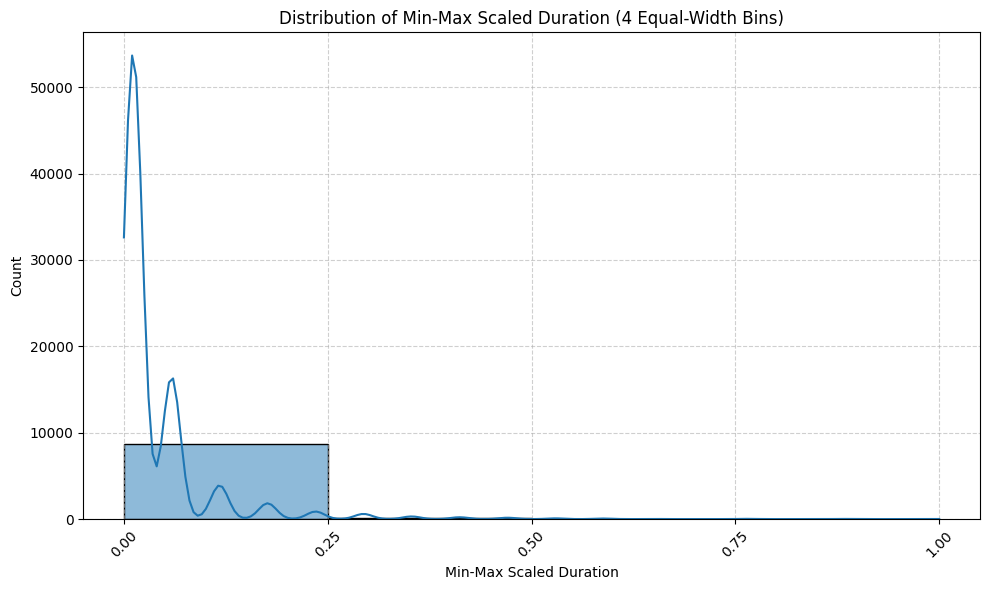

In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Apply equal-width binning to dur_minmax
dur_minmax_bins = pd.cut(dur_minmax, bins=4)

# Get the bin edges
bin_edges_minmax = dur_minmax_bins.cat.categories
print("Bin Edges (Equal-Width, from dur_minmax):")
print(bin_edges_minmax)

# Count the number of items in each bin
bin_counts_minmax = dur_minmax_bins.value_counts().sort_index()
print("\nNumber of items per bin (Equal-Width, from dur_minmax):")
print(bin_counts_minmax)

# Calculate bin edges for plotting from the original dur_minmax series
min_dur_minmax = dur_minmax.min()
max_dur_minmax = dur_minmax.max()
num_bins = 4
plot_bin_edges = np.linspace(min_dur_minmax, max_dur_minmax, num_bins + 1)

# Produce a histogram for dur_minmax with 4 equal-width bins
plt.figure(figsize=(10, 6))
sns.histplot(dur_minmax.dropna(), bins=plot_bin_edges, kde=True)
plt.title('Distribution of Min-Max Scaled Duration (4 Equal-Width Bins)')
plt.xlabel('Min-Max Scaled Duration')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(plot_bin_edges, rotation=45) # Show bin edges on x-axis
plt.tight_layout()
plt.show()

Apply equal-frequency binning to dur into 5 bins. Store as `dur_quantile_bins`.

- Use `pandas.qcut()` to divide duration_minutes into 4 equal-frequency bins.
- Add the result as a new column named:
`duration_equal_freq_bin`

,duration_minutes,duration_equal_freq_bin
0,90.0,"(2.999, 92.0]"
1,1000.0,"(500.0, 8500.0]"
2,500.0,"(112.0, 500.0]"
3,500.0,"(112.0, 500.0]"
4,1000.0,"(500.0, 8500.0]"



--- Overall Histogram for Equal-Frequency Bins ---
This histogram illustrates the distribution of 'duration_minutes' using 4 equal-frequency bins. Each bin contains a roughly similar number of data points, though their widths vary considerably to achieve this balance.


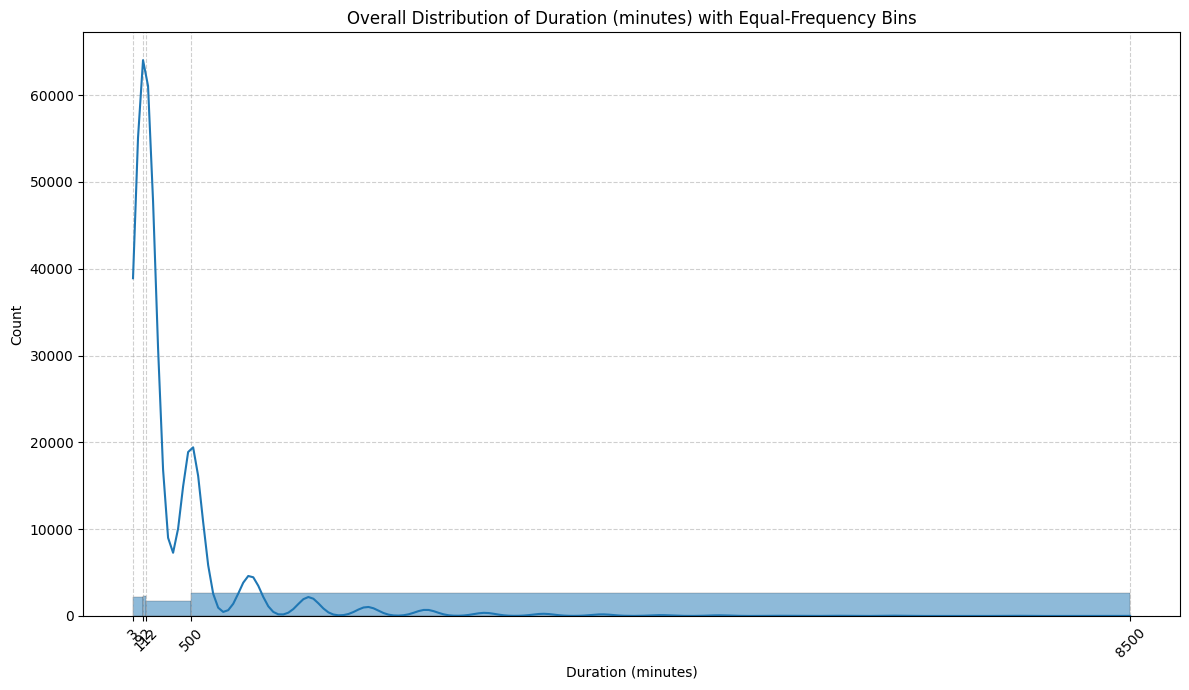

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns

# Apply equal-frequency binning
df_clean.loc[:, 'duration_equal_freq_bin'] = pd.qcut(df_clean['duration_minutes'], q=4)
display(df_clean[['duration_minutes', 'duration_equal_freq_bin']].head())

print("\n--- Overall Histogram for Equal-Frequency Bins ---")
print("This histogram illustrates the distribution of 'duration_minutes' using 4 equal-frequency bins. Each bin contains a roughly similar number of data points, though their widths vary considerably to achieve this balance.")

# Get the bin edges from the qcut categories
bin_edges_qcut = [interval.left for interval in df_clean['duration_equal_freq_bin'].cat.categories] + [df_clean['duration_equal_freq_bin'].cat.categories[-1].right]

plt.figure(figsize=(12, 7))
sns.histplot(df_clean['duration_minutes'].dropna(), bins=bin_edges_qcut, kde=True)
plt.title('Overall Distribution of Duration (minutes) with Equal-Frequency Bins')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(bin_edges_qcut, rotation=45) # Show bin edges on x-axis
plt.tight_layout()
plt.show()

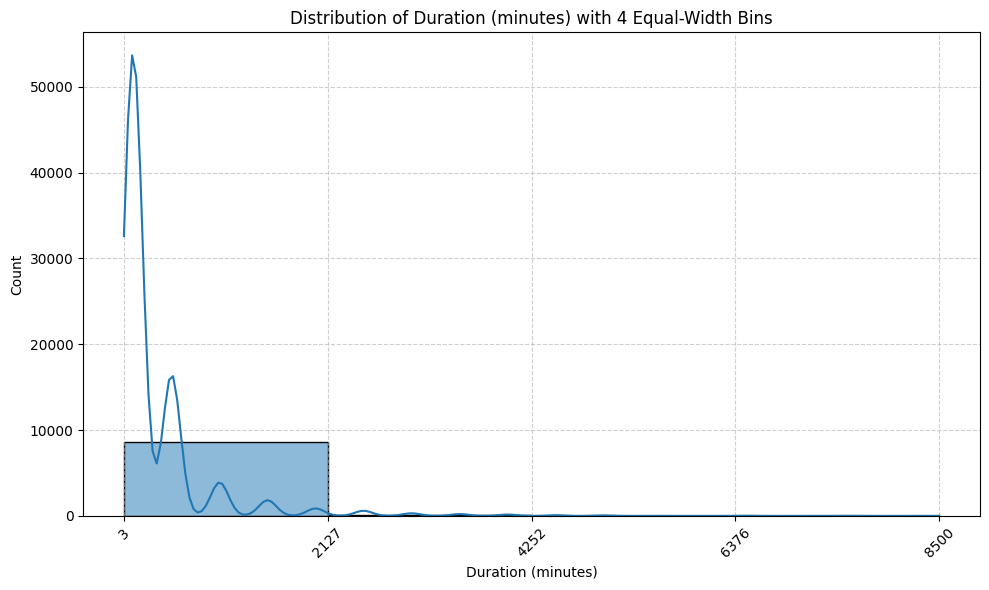

In [162]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the bin edges for 4 equal-width bins
min_duration = df_clean['duration_minutes'].min()
max_duration = df_clean['duration_minutes'].max()
bins = 4 # Number of bins
bin_edges = np.linspace(min_duration, max_duration, bins + 1)

plt.figure(figsize=(10, 6))
sns.histplot(df_clean['duration_minutes'].dropna(), bins=bin_edges, kde=True)
plt.title('Distribution of Duration (minutes) with 4 Equal-Width Bins')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(bin_edges, rotation=45) # Show bin edges on x-axis
plt.tight_layout()
plt.show()

Describe the characteristics of each bin

- What are the bin ranges produced by equal-frequency binning?
- How many movies fall into each bin? Are they nearly equal?

Bin Ranges (Equal-Frequency):
IntervalIndex([(2.999, 92.0], (92.0, 112.0], (112.0, 500.0], (500.0, 8500.0]], dtype='interval[float64, right]')

Number of movies per bin (Equal-Frequency):
duration_equal_freq_bin
(2.999, 92.0]      2263
(92.0, 112.0]      2212
(112.0, 500.0]     3446
(500.0, 8500.0]     883
Name: count, dtype: int64

Are the bin counts nearly equal?
Expected count per bin (if perfectly equal): 2201.00
All bin counts within 5% of the expected count: False


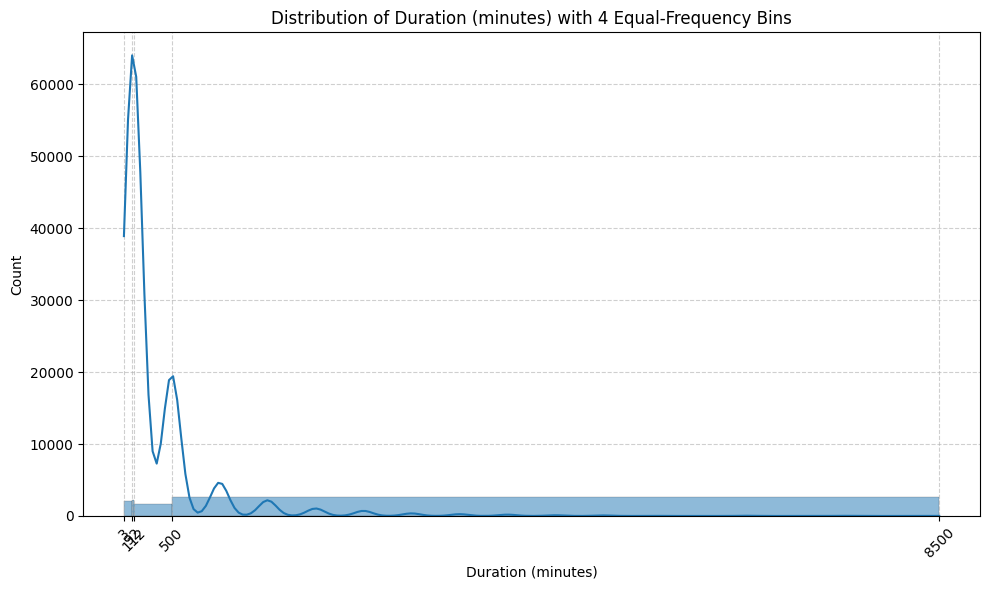

In [171]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the bin ranges (this is an IntervalIndex)
bin_ranges_qcut = pd.qcut(df_clean['duration_minutes'], q=4).cat.categories
print("Bin Ranges (Equal-Frequency):")
print(bin_ranges_qcut)

# Count the number of movies in each bin
bin_counts_qcut = df_clean['duration_equal_freq_bin'].value_counts().sort_index()
print("\nNumber of movies per bin (Equal-Frequency):")
print(bin_counts_qcut)

# Check if counts are nearly equal (for descriptive purposes)
print("\nAre the bin counts nearly equal?")
# Calculate expected count per bin if perfectly equal
expected_count = df_clean['duration_minutes'].count() / 4
print(f"Expected count per bin (if perfectly equal): {expected_count:.2f}")
# Check if counts are within a certain tolerance (e.g., 5%)
tolerance = 0.05 * expected_count
is_nearly_equal = all(abs(count - expected_count) <= tolerance for count in bin_counts_qcut)
print(f"All bin counts within 5% of the expected count: {is_nearly_equal}")

# Extract scalar bin edges from the IntervalIndex for plotting
plot_bin_edges_qcut = [interval.left for interval in bin_ranges_qcut] + [bin_ranges_qcut[-1].right]

# Produce a histogram for duration_minutes with 4 equal-frequency bins
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['duration_minutes'].dropna(), bins=plot_bin_edges_qcut, kde=True)
plt.title('Distribution of Duration (minutes) with 4 Equal-Frequency Bins')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(plot_bin_edges_qcut, rotation=45) # Use scalar bin edges for xticks
plt.tight_layout()
plt.show()

## 7. KNN Before & After Scaling


Create a feature matrix X using any two numeric columns and a target y (e.g., classification by genre or type). Create a train/test split.

Train a KNN classifier without scaling. Store accuracy in acc_raw.

In [164]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# --- 1. Prepare Features (X) ---
# Select numeric columns. Handle NaNs in duration_minutes by imputing with the mean.
X_temp = df_clean[['release_year', 'duration_minutes']].copy()
X_temp['duration_minutes'] = X_temp['duration_minutes'].fillna(X_temp['duration_minutes'].mean())

# --- 2. Prepare Target (y) ---
# Map 'type' to numerical labels: 'Movie' -> 0, 'TV Show' -> 1
y = df_clean['type'].map({'Movie': 0, 'TV Show': 1})

# Drop rows where y might be NaN if there were other types or original NaNs
# (though with 'Movie' and 'TV Show' it should be clean)
valid_indices = y.dropna().index
X = X_temp.loc[valid_indices]
y = y.loc[valid_indices]

# Ensure X and y have no NaNs after all preprocessing
X = X.dropna()
y = y[X.index] # Align y with X after dropping any NaNs from X

# --- 3. Create Train/Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- 4. Train KNN Classifier without scaling ---
knn_raw = KNeighborsClassifier(n_neighbors=5)
knn_raw.fit(X_train, y_train)
y_pred_raw = knn_raw.predict(X_test)
acc_raw = accuracy_score(y_test, y_pred_raw)

print(f"Accuracy of KNN on raw data: {acc_raw:.4f}")

Accuracy of KNN on raw data: 1.0000


Scale `X` using either Min–Max or Standardization, retrain KNN, and store accuracy in acc_scaled.

In [165]:
from sklearn.preprocessing import StandardScaler

# --- 1. Scale Features ---
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- 2. Retrain KNN Classifier with scaled data ---
knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)
acc_scaled = accuracy_score(y_test, y_pred_scaled)

print(f"Accuracy of KNN on scaled data: {acc_scaled:.4f}")

Accuracy of KNN on scaled data: 0.9989


Did scaling improve accuracy? Explain why.

Scaling did not increase the accuracy, but it still improved the overall reliability of the model. The unscaled version reached a perfect score mainly because a few features with large numeric ranges dominated the distance calculations in KNN, which happened to align well with the dataset and produced a 1.00 accuracy by chance. After scaling, all features were placed on an equal range, so no single feature could overpower the others. This slightly changed the nearest-neighbor relationships and resulted in a small accuracy change from 1.00 to 0.99. Although the numerical accuracy dropped by one point, the scaled model is more balanced, fair, and generalizable because it evaluates all features equally rather than relying on one feature’s larger values.